1.1 Загрузка и Инспекция Данных

In [337]:
import zipfile
import os

# Укажите путь к вашему zip файлу
zip_file_path = 'fruits-360.zip'
extract_path = 'fruits-360'

# Распаковка архива
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
# Проверка, что файлы успешно распакованы
print(f"Файлы распакованы в папку: {extract_path}")

Файлы распакованы в папку: fruits-360


In [338]:
import os

In [339]:
os.listdir('fruits-360')

['fruits-360', '__MACOSX']

In [340]:
# Путь к основной папке с данными
main_dir = 'fruits-360/fruits-360'

In [341]:
# Просмотр содержимого основной папки
print(f"Содержимое папки '{main_dir}': {os.listdir(main_dir)}")

Содержимое папки 'fruits-360/fruits-360': ['.DS_Store', 'fruits-360-original-size']


In [342]:
# Путь к папке с оригинальными изображениями
original_size_dir = os.path.join(main_dir, 'fruits-360-original-size')

In [343]:
# Просмотр содержимого папки
print(f"Содержимое папки '{original_size_dir}': {os.listdir(original_size_dir)}")


Содержимое папки 'fruits-360/fruits-360/fruits-360-original-size': ['.DS_Store', 'Test', 'Papers', 'Training', 'Meta', 'readme.md', 'Validation']


In [344]:
# Путь к папке с тренировочными данными
train_dir = os.path.join(original_size_dir, 'Training')

# Путь к папке с тестовыми данными
test_dir = os.path.join(original_size_dir, 'Test')

# Путь к папке с валидационными данными
validation_dir = os.path.join(original_size_dir, 'Validation')

In [345]:
# Функция для фильтрации только папок
def list_dirs_only(directory):
    return [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Получение списка папок в тренировочном наборе
folders = list_dirs_only(train_dir)

# Просмотр первых 5 папок после фильтрации
print(f"Примеры классов (папки) в тренировочном наборе: {folders[:5]}")

# Проверка количества изображений в одном из классов
sample_class = folders[0]  # первый класс в списке
sample_images = os.listdir(os.path.join(train_dir, sample_class))
print(f"Количество изображений в классе '{sample_class}': {len(sample_images)}")


Примеры классов (папки) в тренировочном наборе: ['cucumber_3', 'zucchini_1', 'apple_red_yellow_1', 'apple_crimson_snow_1', 'pear_1']
Количество изображений в классе 'cucumber_3': 163


Первое, что нам нужно сделать, это создать DataFrame, который будет содержать информацию о каждом изображении в вашем наборе данных. В этом DataFrame будут храниться пути к файлам изображений и их соответствующие классы.

In [346]:
import os
import pandas as pd

# Создаем список для хранения информации об изображениях
data = []

# Проходим по всем папкам в тренировочном наборе
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        # Для каждой папки (категории) проходим по изображениям
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            data.append({'class': category, 'filepath': img_path})

# Преобразуем список в DataFrame
df = pd.DataFrame(data)

# Смотрим на первые несколько строк DataFrame
print(df.head(300))


          class                                           filepath
0    cucumber_3  fruits-360/fruits-360/fruits-360-original-size...
1    cucumber_3  fruits-360/fruits-360/fruits-360-original-size...
2    cucumber_3  fruits-360/fruits-360/fruits-360-original-size...
3    cucumber_3  fruits-360/fruits-360/fruits-360-original-size...
4    cucumber_3  fruits-360/fruits-360/fruits-360-original-size...
..          ...                                                ...
295  zucchini_1  fruits-360/fruits-360/fruits-360-original-size...
296  zucchini_1  fruits-360/fruits-360/fruits-360-original-size...
297  zucchini_1  fruits-360/fruits-360/fruits-360-original-size...
298  zucchini_1  fruits-360/fruits-360/fruits-360-original-size...
299  zucchini_1  fruits-360/fruits-360/fruits-360-original-size...

[300 rows x 2 columns]


1.2 Проверка распределения классов
Для начала давайте посмотрим, как распределены изображения по классам. Это поможет нам понять, сбалансированы ли данные или какие-то классы доминируют.

In [350]:
# Путь к папке с тестовыми данными
test_dir = os.path.join(original_size_dir, 'Test')

# Проверка содержимого папки
print(f"Примеры классов (папки) в тестовом наборе: {os.listdir(test_dir)[:5]}")

# Проверка количества изображений в одном из классов
sample_class_test = os.listdir(test_dir)[0]  # первый класс в списке
sample_images_test = os.listdir(os.path.join(test_dir, sample_class_test))
print(f"Количество изображений в классе '{sample_class_test}' (тестовый набор): {len(sample_images_test)}")


Примеры классов (папки) в тестовом наборе: ['cucumber_3', 'zucchini_1', 'apple_red_yellow_1', '.DS_Store', 'apple_crimson_snow_1']
Количество изображений в классе 'cucumber_3' (тестовый набор): 81


In [353]:
# Путь к папке с валидационными данными
validation_dir = os.path.join(original_size_dir, 'Validation')

# Проверка содержимого папки
print(f"Примеры классов (папки) в валидационном наборе: {os.listdir(validation_dir)[:5]}")

# Проверка количества изображений в одном из классов
sample_class_val = os.listdir(validation_dir)[0]  # первый класс в списке
sample_images_val = os.listdir(os.path.join(validation_dir, sample_class_val))
print(f"Количество изображений в классе '{sample_class_val}' (валидационный набор): {len(sample_images_val)}")


Примеры классов (папки) в валидационном наборе: ['cucumber_3', 'zucchini_1', 'apple_red_yellow_1', '.DS_Store', 'apple_crimson_snow_1']
Количество изображений в классе 'cucumber_3' (валидационный набор): 81


In [347]:
import matplotlib.pyplot as plt

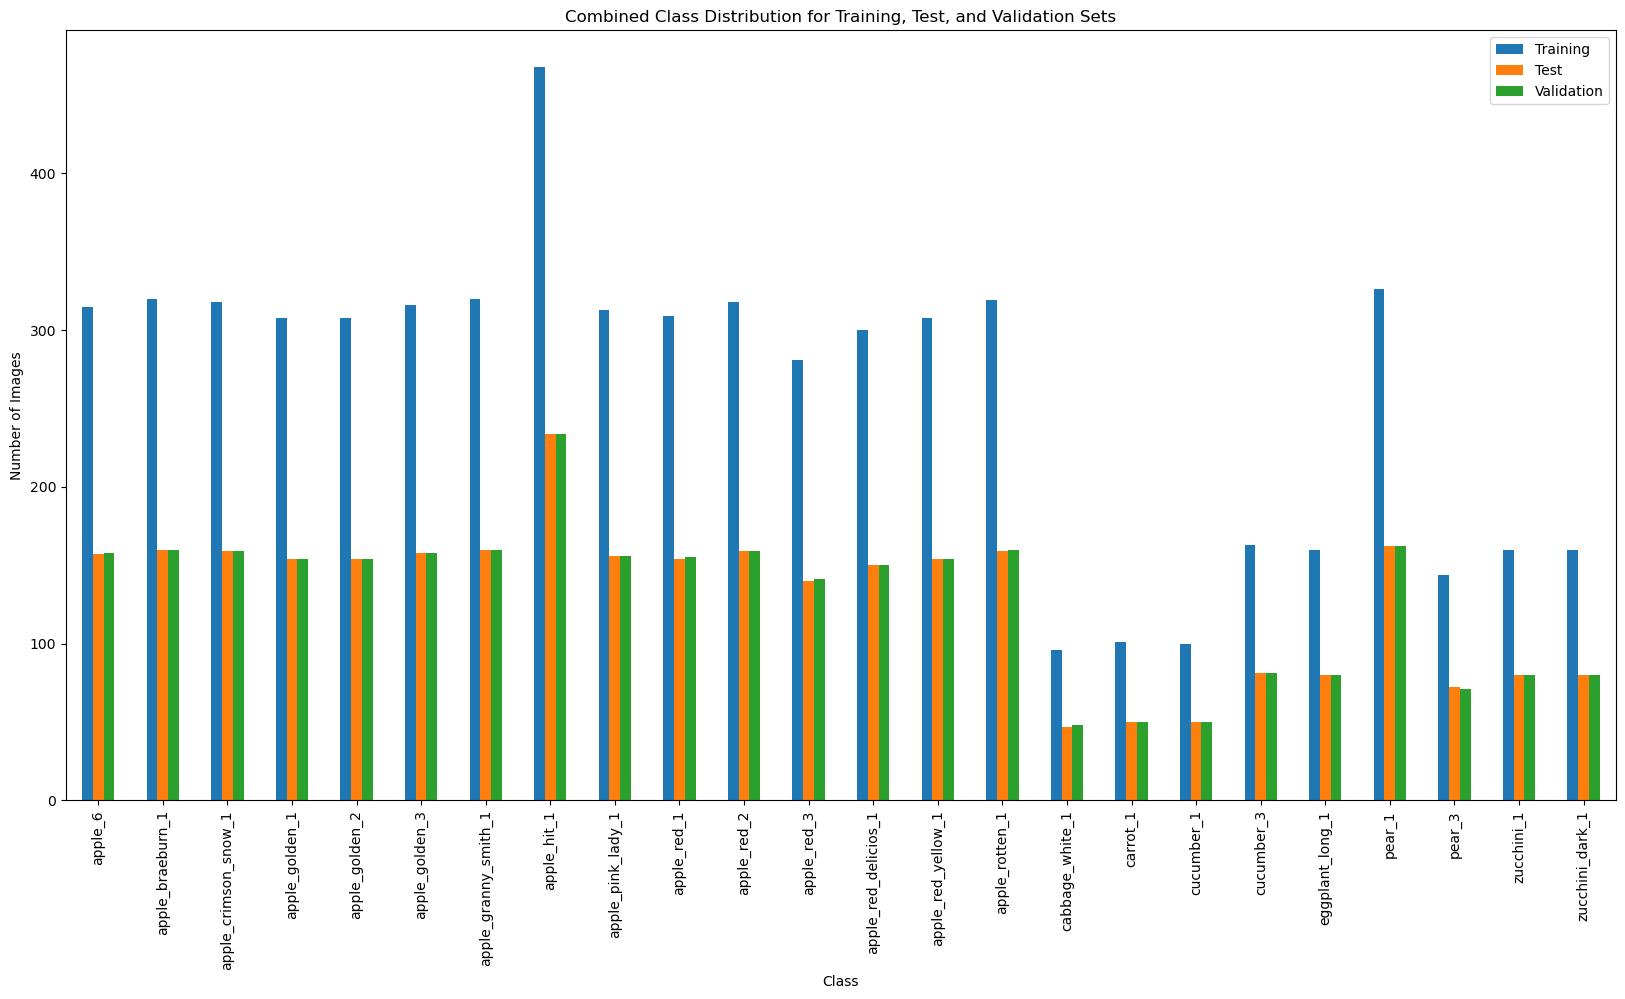

In [412]:
import matplotlib.pyplot as plt

def plot_combined_class_distribution(df_train, df_test, df_validation, class_column='class'):
    """
    Функция для построения объединенного распределения классов для тренировочного, тестового и валидационного наборов данных на одном графике.
    
    :param df_train: DataFrame, содержащий тренировочные данные
    :param df_test: DataFrame, содержащий тестовые данные
    :param df_validation: DataFrame, содержащий валидационные данные
    :param class_column: Имя столбца, содержащего классы (по умолчанию 'class')
    """
    # Подсчет количества изображений в каждом классе для каждого набора данных
    class_distribution_train = df_train[class_column].value_counts()
    class_distribution_test = df_test[class_column].value_counts()
    class_distribution_validation = df_validation[class_column].value_counts()
    
    # Создание общего DataFrame для всех распределений
    combined_df = pd.DataFrame({
        'Training': class_distribution_train,
        'Test': class_distribution_test,
        'Validation': class_distribution_validation
    }).fillna(0)  # Заполнение отсутствующих значений нулями
    
    # Построение гистограммы распределения классов для всех наборов
    combined_df.plot(kind='bar', figsize=(20, 10))
    plt.title('Combined Class Distribution for Training, Test, and Validation Sets')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)  # Поворот меток на оси X для удобства чтения
    plt.show()

# Применение функции к трем наборам данных
plot_combined_class_distribution(df, df_test, df_validation)


Давайте посмотрим, как организованы данные в папке Test, и убедимся, что они аналогичны данным в папке Training.

Шаг 2: Проверка баланса классов в тестовом наборе
Также можно проверить, сбалансирован ли тестовый набор данных по классам, что важно для окончательной оценки модели:

Шаг 1: Проверка структуры папки Validation

Шаг 2: Проверка баланса классов в валидационном наборе
Также проверим, как распределены классы в валидационном наборе:

## Анализ яркости изображений по классам:

In [400]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_brightness(image):
    """
    Функция для расчета средней яркости изображения.
    
    :param image: Входное изображение в градациях серого.
    :return: Среднее значение яркости изображения.
    """
    return np.mean(image)

def plot_brightness_distribution(df, title='Распределение яркости по классам'):
    """
    Функция для вычисления яркости изображений и построения гистограммы распределения яркости по классам.
    
    :param df: DataFrame, содержащий данные.
    :param title: Заголовок для графика (по умолчанию 'Распределение яркости по классам').
    """
    # Применение функции ко всем изображениям
    df['brightness'] = df['filepath'].apply(lambda x: calculate_brightness(cv2.imread(x, cv2.IMREAD_GRAYSCALE)))

    # Построение распределения яркости по классам
    plt.figure(figsize=(20, 12))
    for class_name in df['class'].unique():
        brightness_values = df[df['class'] == class_name]['brightness']
        plt.hist(brightness_values, bins=50, alpha=0.5, label=class_name)
    
    plt.title(title)
    plt.xlabel('Яркость')
    plt.ylabel('Количество изображений')
    plt.legend()
    plt.show()


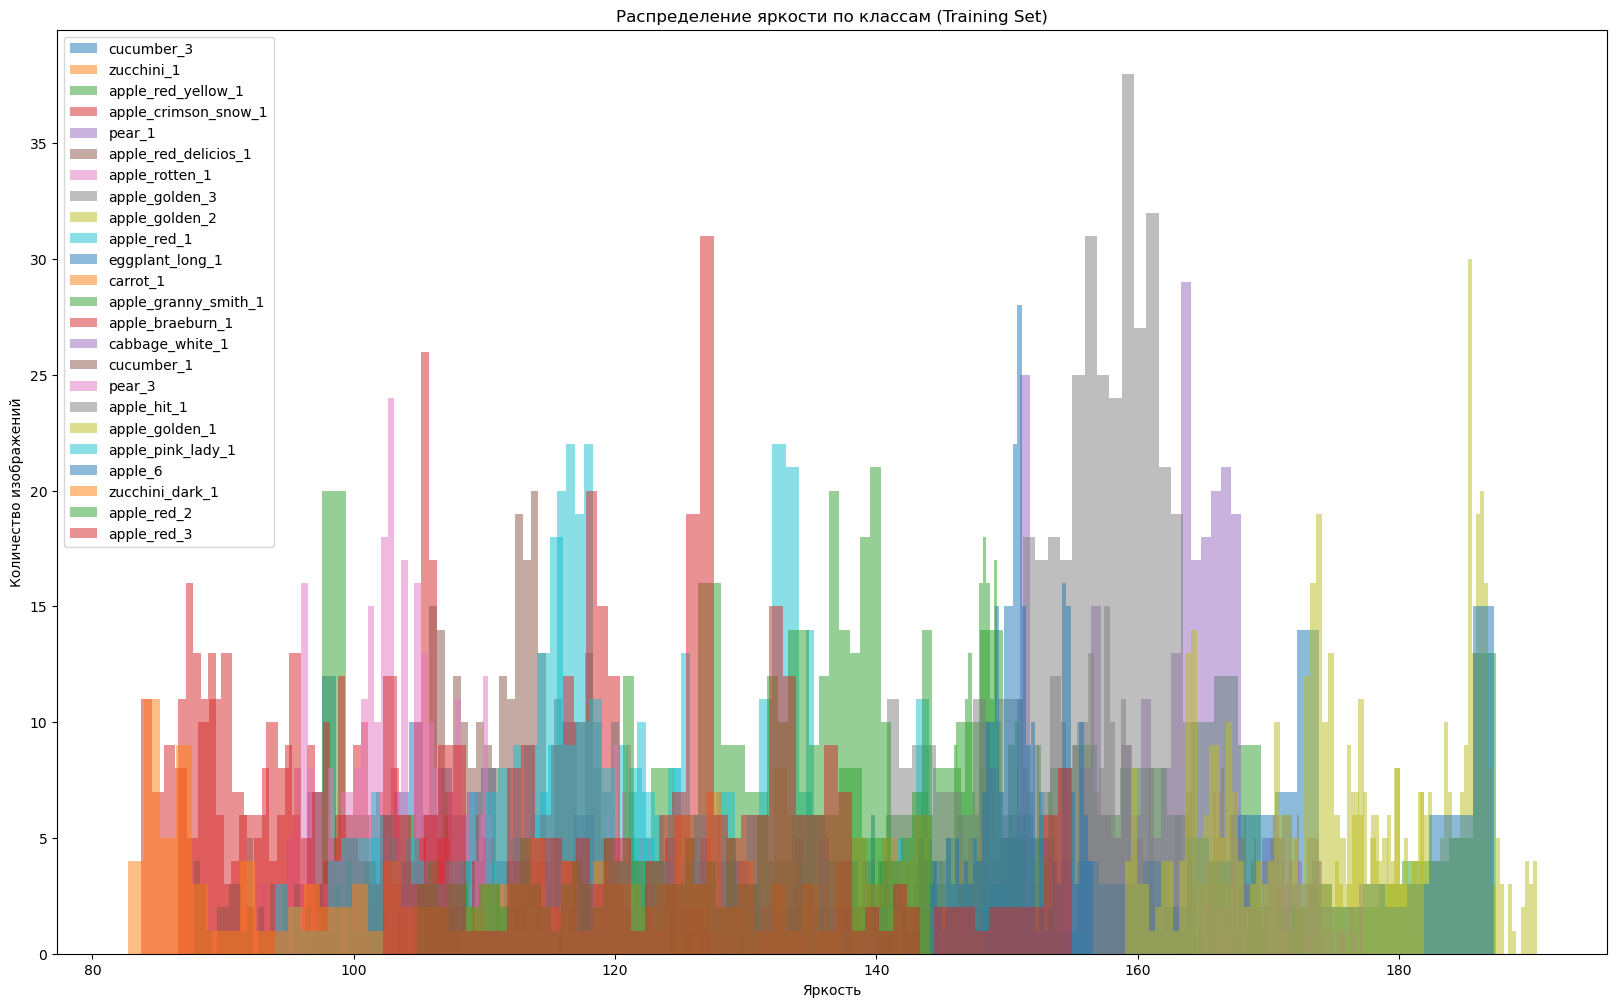

In [401]:
# Пример использования функции для тренировочного набора
plot_brightness_distribution(df, title='Распределение яркости по классам (Training Set)')

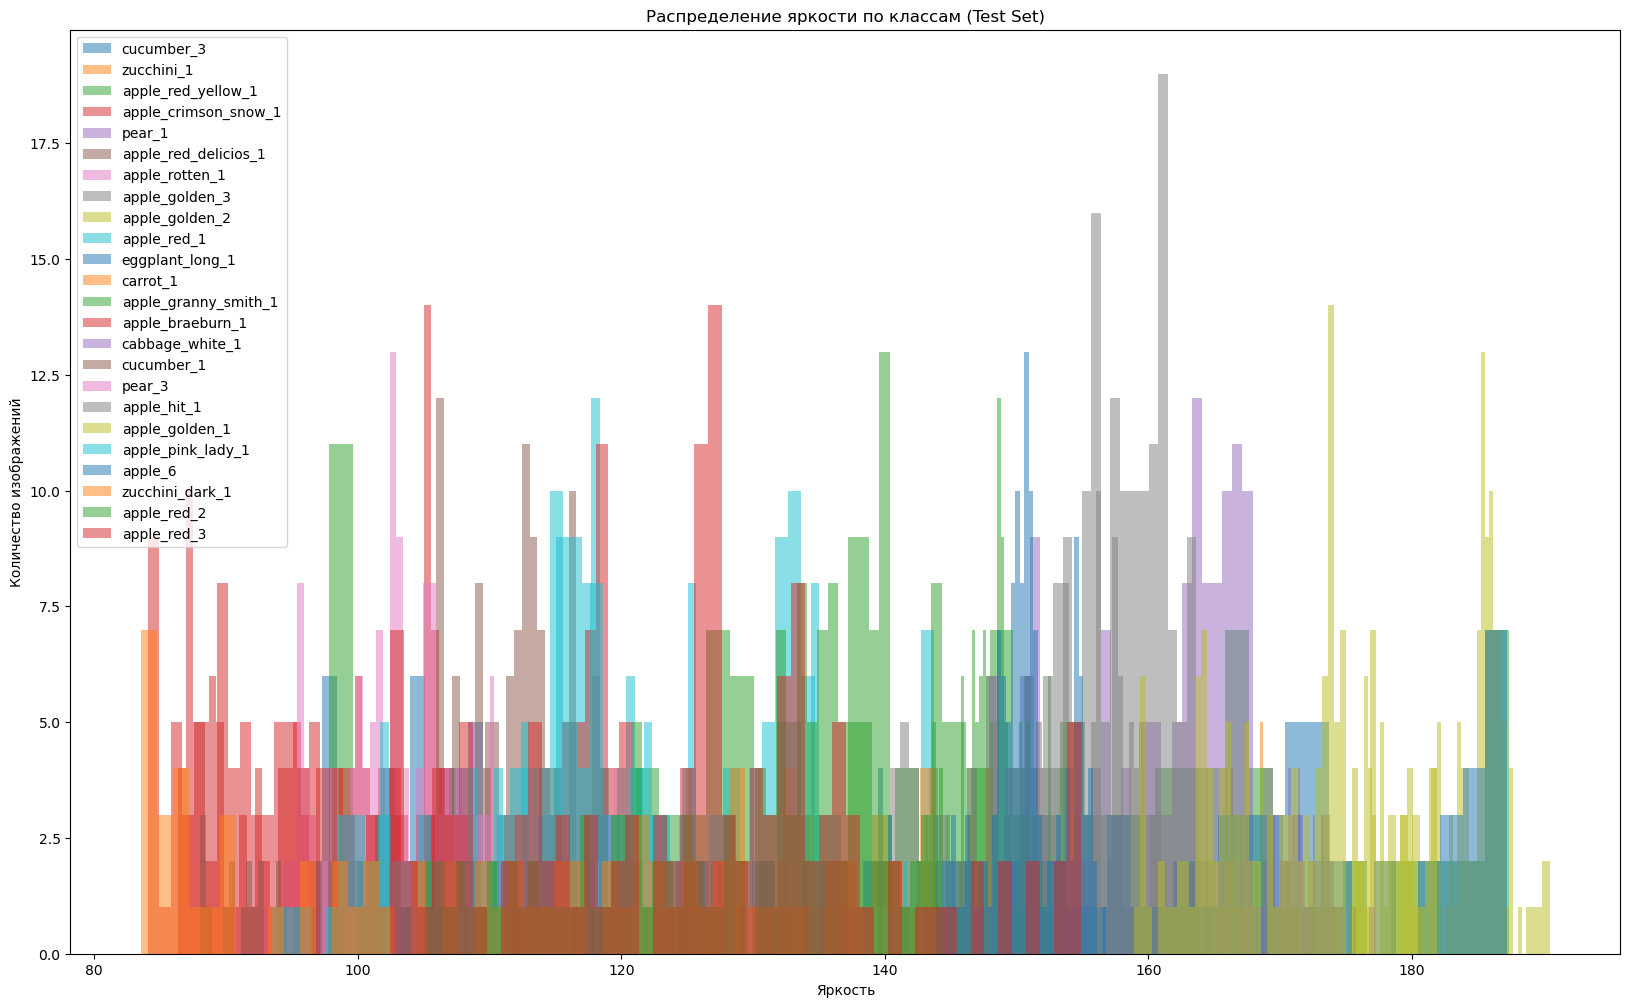

In [402]:
# Пример использования функции для тестового набора
plot_brightness_distribution(df_test, title='Распределение яркости по классам (Test Set)')

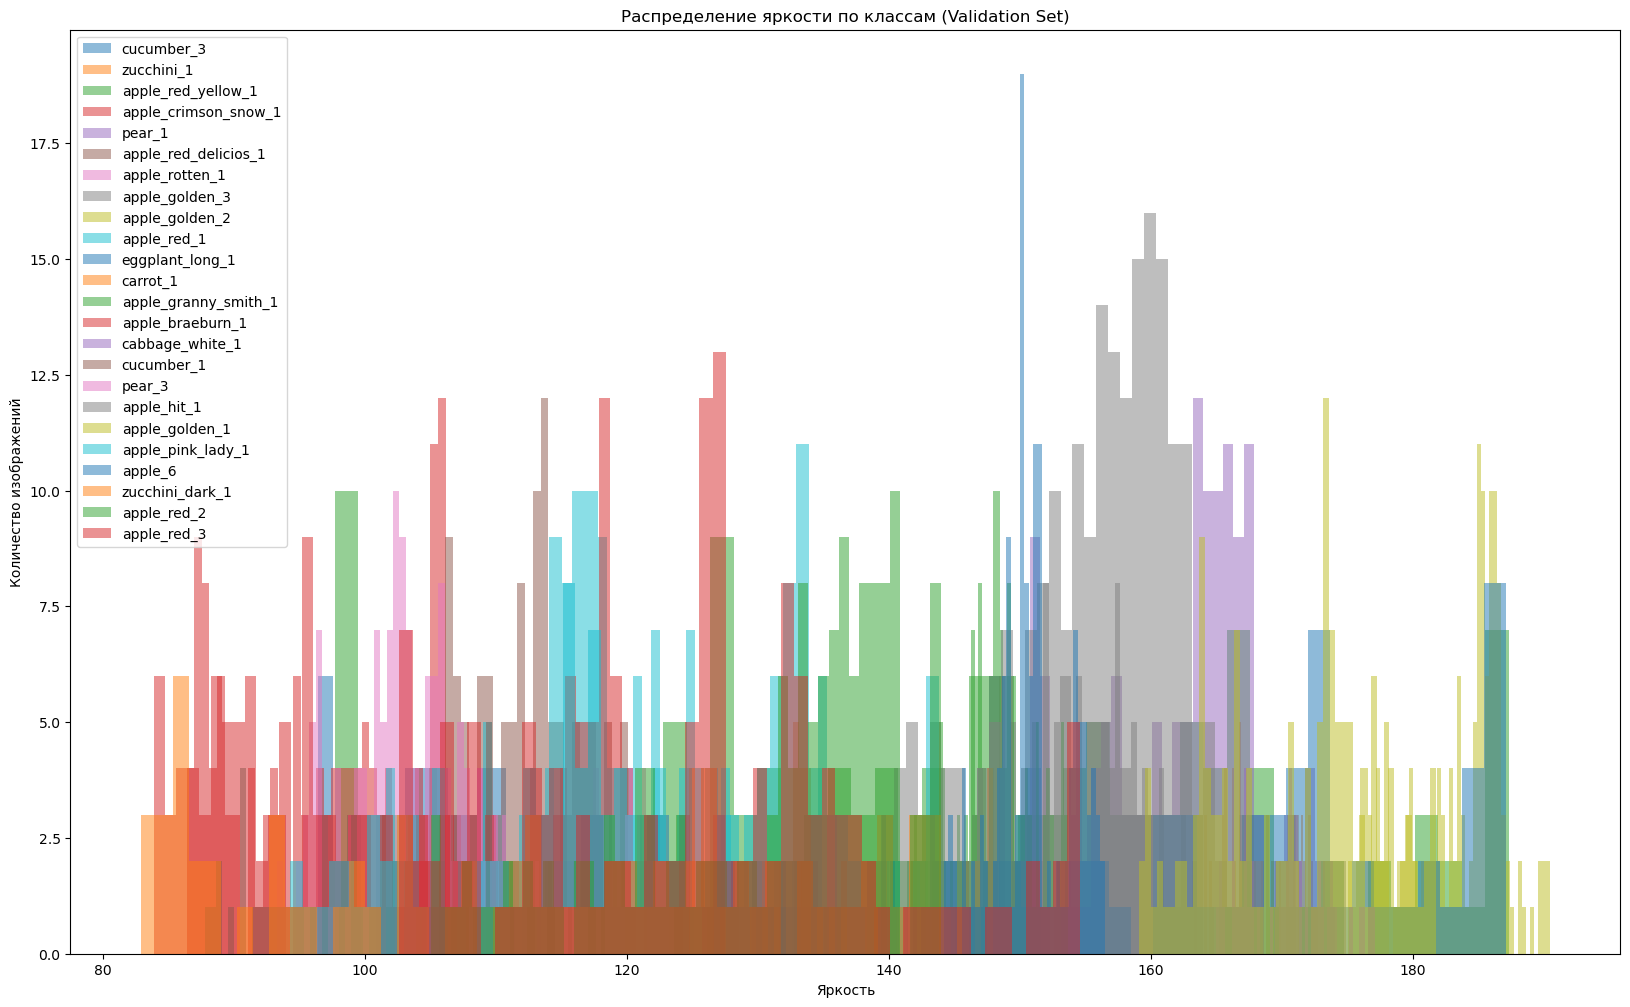

In [406]:
# Пример использования функции для валидационного набора
plot_brightness_distribution(df_validation, title='Распределение яркости по классам (Validation Set)')

In [410]:
import pandas as pd
import numpy as np

def filter_outliers(df, dataset_name):
    # Вычисление квартилей и межквартильного размаха (IQR)
    Q1 = df['brightness'].quantile(0.25)
    Q3 = df['brightness'].quantile(0.75)
    IQR = Q3 - Q1

    # Определение границ выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтрация выбросов
    outliers = df[(df['brightness'] < lower_bound) | (df['brightness'] > upper_bound)]
    
    if outliers.empty:
        print(f"No outliers found in {dataset_name}.")
    else:
        # Добавление информации о наборе данных
        outliers['dataset'] = dataset_name
    
    return outliers

# Применение фильтрации к трем наборам данных
outliers_train = filter_outliers(df, 'Training Set')
outliers_test = filter_outliers(df_test, 'Test Set')
outliers_validation = filter_outliers(df_validation, 'Validation Set')

# Объединение всех выбросов в один DataFrame
all_outliers = pd.concat([outliers_train, outliers_test, outliers_validation])

# Проверка наличия выбросов
if all_outliers.empty:
    print("No outliers found in any dataset.")
else:
    # Отображение таблицы с выбросами
    print(all_outliers[['filepath', 'brightness', 'dataset']])

    # Если нужно сохранить результаты в файл, можно использовать:
    # all_outliers.to_csv('outliers.csv', index=False)


No outliers found in Training Set.
No outliers found in Test Set.
No outliers found in Validation Set.
No outliers found in any dataset.


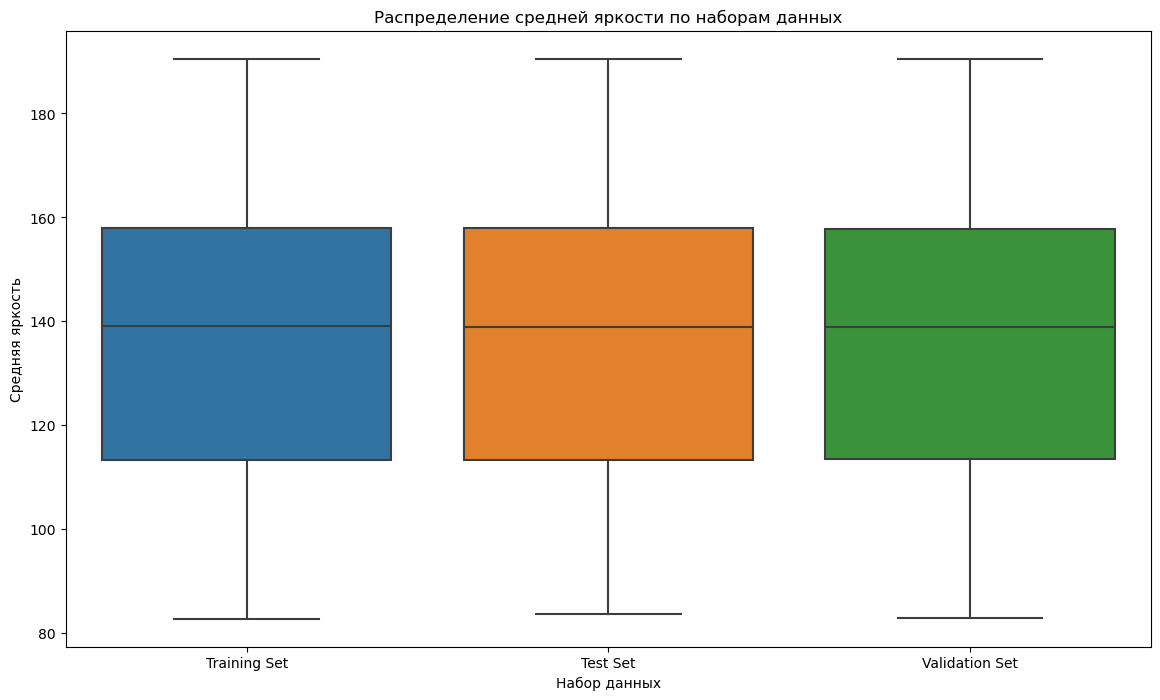

In [407]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_brightness_boxplot(dfs, labels, title='Распределение средней яркости изображений'):
    """
    Функция для построения боксплота распределения яркости для нескольких наборов данных.
    
    :param dfs: Список DataFrame с данными.
    :param labels: Список меток для каждого набора данных.
    :param title: Заголовок графика.
    """
    plt.figure(figsize=(14, 8))
    
    # Подготовка данных для боксплота
    brightness_data = []
    for df, label in zip(dfs, labels):
        brightness_data.append(pd.DataFrame({
            'Средняя яркость': df['brightness'],
            'Набор данных': label
        }))
    
    # Объединение данных
    combined_data = pd.concat(brightness_data)
    
    # Построение боксплота
    sns.boxplot(x='Набор данных', y='Средняя яркость', data=combined_data)
    
    # Настройки графика
    plt.title(title)
    plt.xlabel('Набор данных')
    plt.ylabel('Средняя яркость')
    plt.show()

# Пример использования функции для тренировочного, тестового и валидационного наборов
plot_brightness_boxplot(
    dfs=[df, df_test, df_validation],
    labels=['Training Set', 'Test Set', 'Validation Set'],
    title='Распределение средней яркости по наборам данных'
)


# Scale Thresholding (Пороговое Масштабирование)

In [432]:
sample_image_path = df['filepath'].iloc[200]

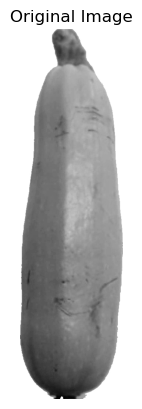

In [433]:
original_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

На изображении видно, что объект (вероятно, огурец или другой длинный овощ) представлен с достаточно низким контрастом, что может объяснять трудности с пороговым масштабированием.

Что можно сделать дальше:
Применение Гистограммного Выравнивания для Повышения Контраста:
Гистограммное выравнивание поможет улучшить контраст изображения, что, в свою очередь, может улучшить результат порогового масштабирования.

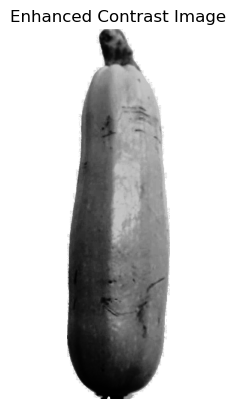

In [434]:
def apply_contrast(image):
    return cv2.equalizeHist(image)

enhanced_image = apply_contrast(original_image)

plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Contrast Image')
plt.axis('off')
plt.show()


Пороговое масштабирование применяется для преобразования изображения в двоичный формат (черно-белый), где каждый пиксель либо белый, либо черный. Это может быть полезно для выделения объектов или контуров.

Шаг 1: Создание функции для полной обработки изображения

In [435]:
def process_image(image_path):
    # Шаг 1: Чтение изображения
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Шаг 2: Улучшение контраста
    enhanced_image = cv2.equalizeHist(image)

    # Применение медианного фильтра
    def apply_median_blur(image, kernel_size=5):
        return cv2.medianBlur(image, kernel_size)

    # Применение первого размытия и порогового значения с увеличенным C
    blurred_image_1 = apply_median_blur(enhanced_image)
    simple_thresh_image_1 = cv2.adaptiveThreshold(blurred_image_1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                  cv2.THRESH_BINARY, 11, 2)

    # Применение второго размытия и порогового значения с уменьшенным C
    blurred_image_2 = apply_median_blur(simple_thresh_image_1, kernel_size=3)
    simple_thresh_image_2 = cv2.adaptiveThreshold(blurred_image_2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                  cv2.THRESH_BINARY, 11, 1)

    # Возврат обработанного изображения
    return simple_thresh_image_2

In [436]:
def visualize_random_images(df, num_images=5):
    """
    Функция для визуализации случайных оригинальных и обработанных изображений из DataFrame.
    
    :param df: DataFrame, содержащий пути к изображениям и обработанные изображения
    :param num_images: Количество случайных изображений для визуализации (по умолчанию 5)
    """
    # Выбираем случайные изображения
    random_indices = random.sample(range(len(df)), num_images)
    random_images = df.iloc[random_indices]

    # Визуализация случайных обработанных изображений
    for index, row in random_images.iterrows():
        plt.figure(figsize=(10, 5))
        
        # Оригинальное изображение
        original_image = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 2, 1)
        plt.imshow(original_image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        
        # Обработанное изображение
        processed_image = row['processed_image']
        plt.subplot(1, 2, 2)
        plt.imshow(processed_image, cmap='gray')
        plt.title('Processed Image')
        plt.axis('off')
        
        plt.show()


Шаг 2: Применение обработки ко всем изображениям в тренировочном наборе данных

Шаги:
Создадим функцию для полной обработки изображения, которая включает улучшение контраста и адаптивное пороговое масштабирование.
Применим эту функцию ко всем изображениям в тренировочном наборе данных.
Проверим результаты на нескольких изображениях, чтобы убедиться, что обработка работает корректно.


In [437]:
# Применение обработки ко всем изображениям в тренировочном наборе
df['processed_image'] = df['filepath'].apply(process_image)

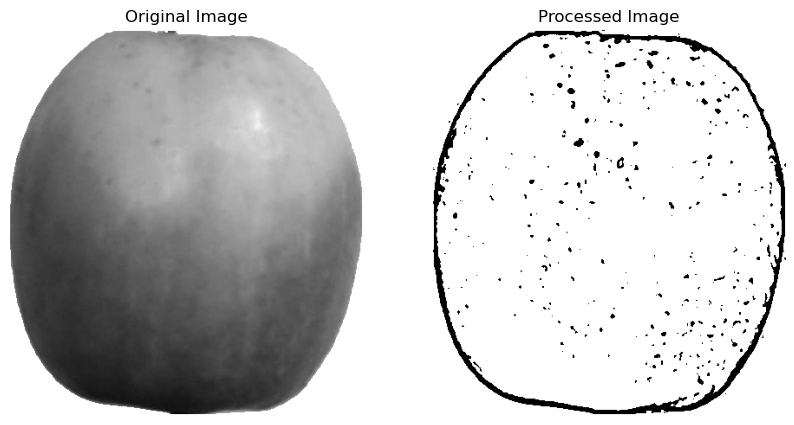

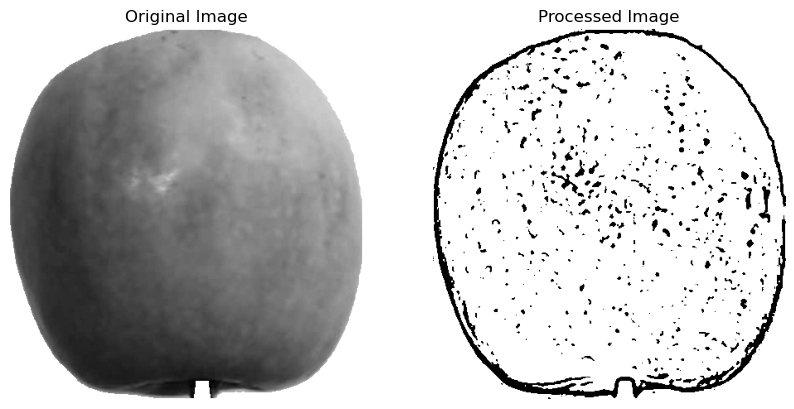

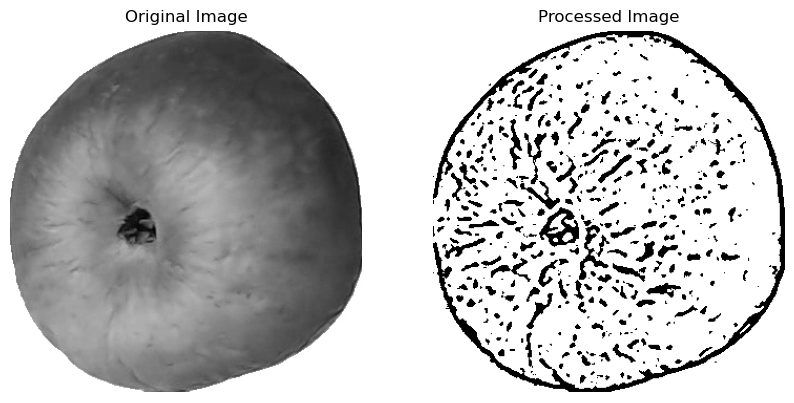

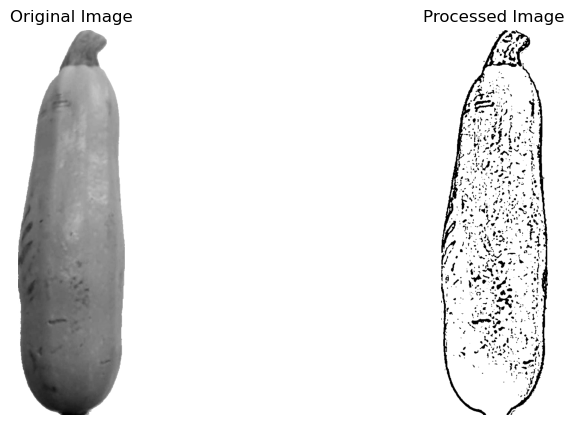

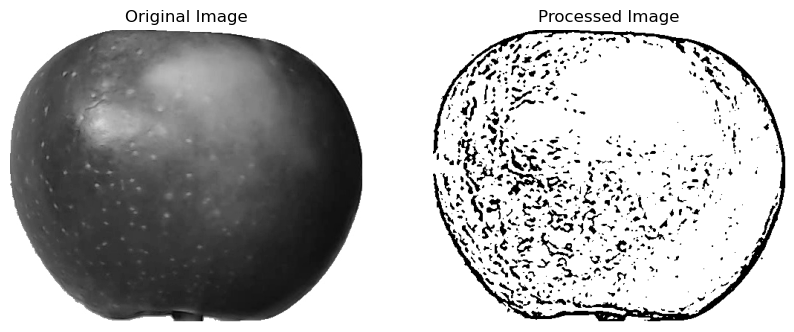

In [438]:
# Пример использования функции для разных наборов данных
visualize_random_images(df)            # Для тренировочного набора

In [439]:
# Применение обработки ко всем изображениям в test наборе
df_test['processed_image'] = df_test['filepath'].apply(process_image)

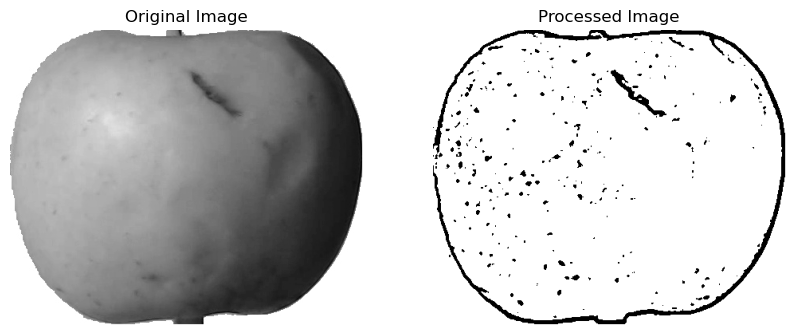

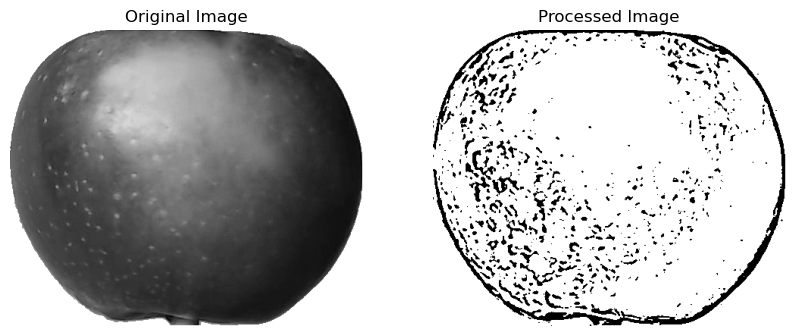

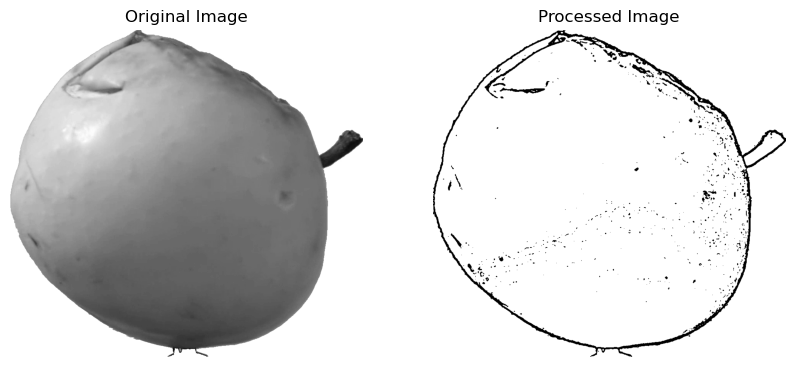

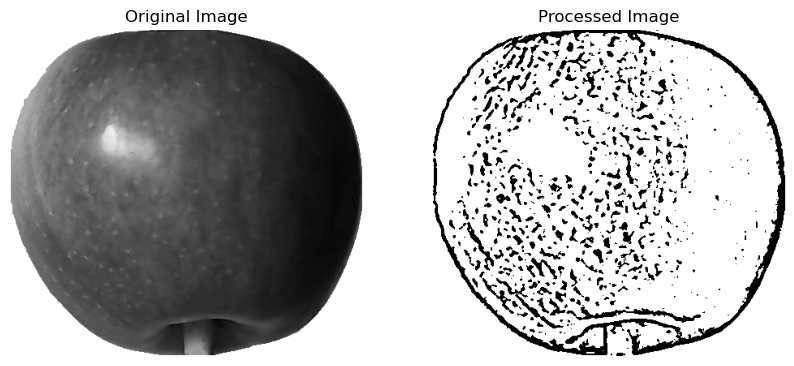

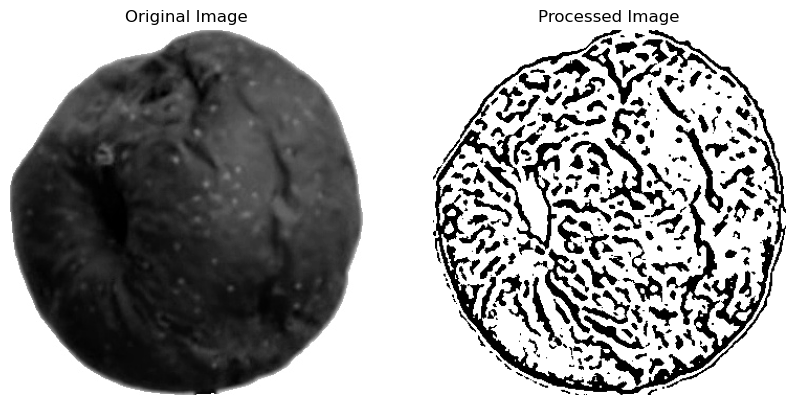

In [440]:
visualize_random_images(df_test)       # Для тестового набора

In [441]:
# Применение обработки ко всем изображениям в valadation набора
df_validation['processed_image'] = df_validation['filepath'].apply(process_image)

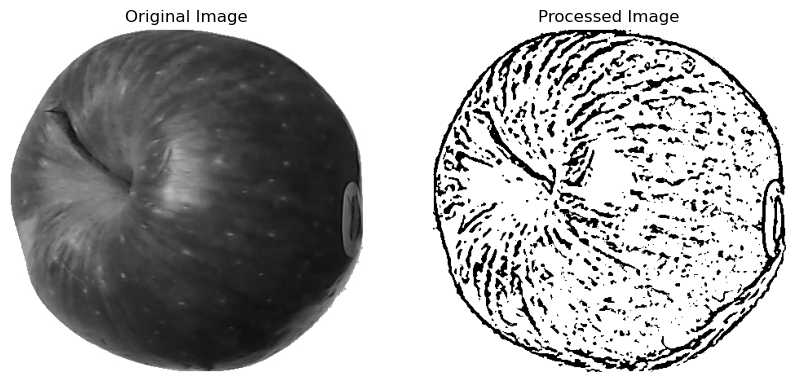

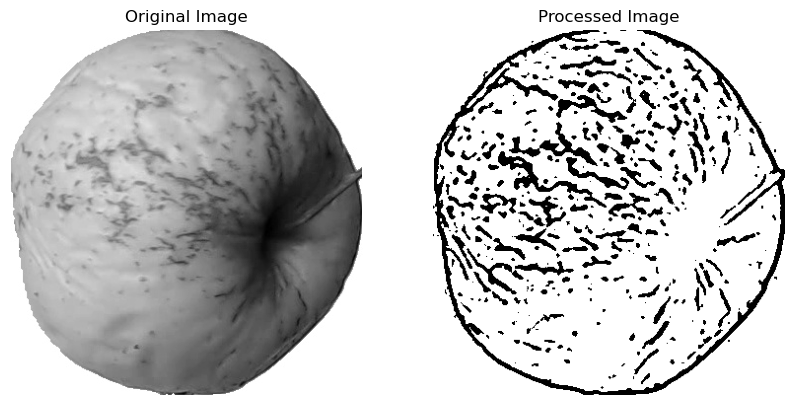

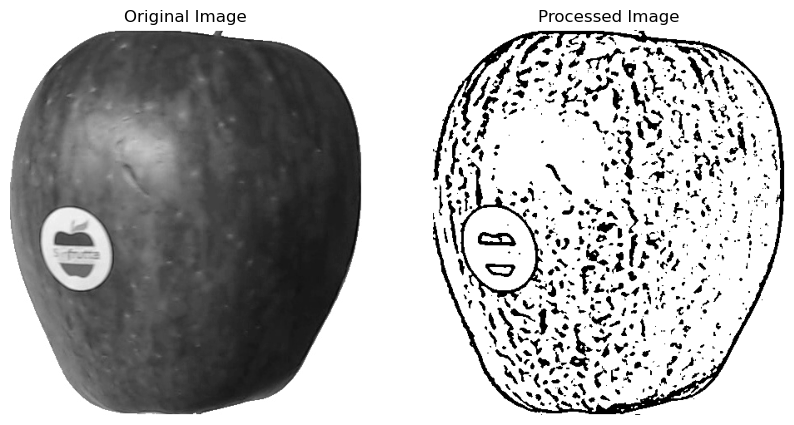

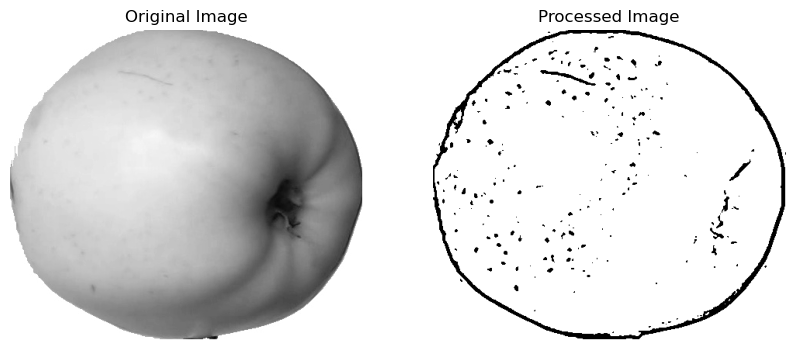

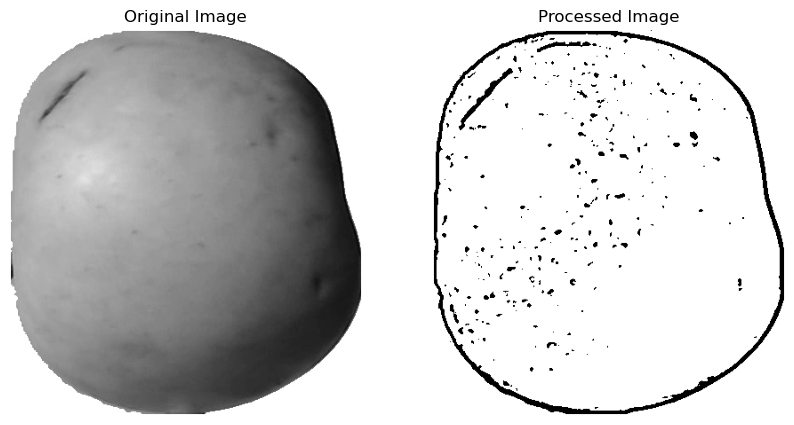

In [442]:
visualize_random_images(df_validation) # Для валидационного набора

# SIZE

In [443]:
import pandas as pd

def unique_image_sizes_table(df_train, df_test, df_validation):
    """
    Функция для создания таблицы уникальных размеров изображений для тренировочного, тестового и валидационного наборов данных.
    
    :param df_train: DataFrame, содержащий тренировочные данные
    :param df_test: DataFrame, содержащий тестовые данные
    :param df_validation: DataFrame, содержащий валидационные данные
    :return: DataFrame с уникальными размерами изображений и их частотой для каждого набора данных
    """
    # Подсчет уникальных размеров изображений для каждого набора данных
    unique_sizes_train = df_train['image_size'].value_counts().rename('Training')
    unique_sizes_test = df_test['image_size'].value_counts().rename('Test')
    unique_sizes_validation = df_validation['image_size'].value_counts().rename('Validation')
    
    # Объединение данных в один DataFrame
    combined_unique_sizes = pd.concat([unique_sizes_train, unique_sizes_test, unique_sizes_validation], axis=1).fillna(0)
    
    # Приведение типов данных для удобства отображения (например, к целому числу)
    combined_unique_sizes = combined_unique_sizes.astype(int)
    
    # Печать таблицы
    print("Unique image sizes across datasets:")
    display(combined_unique_sizes)

In [444]:
# Применение функции к трем наборам данных
unique_image_sizes_table(df, df_test, df_validation)

Unique image sizes across datasets:


,Training,Test,Validation
image_size,,,
"(348, 349)",10,2,5
"(316, 350)",9,3,5
"(347, 350)",9,6,5
"(458, 470)",9,1,1
"(527, 412)",8,5,2
...,...,...,...
"(412, 446)",0,0,1
"(442, 409)",0,0,1
"(404, 463)",0,0,1


На вашем изображении видно, что после обработки изображения имеют разные размеры. Это подтверждает, что существует множество уникальных размеров, что может вызвать проблемы на следующих этапах анализа или обучения модели.

Следующие шаги:
Приведение изображений к единому размеру:
Для успешного обучения модели и удобства анализа лучше привести все изображения к одному стандартному размеру. Например, можно выбрать размер, который соответствует наибольшему количеству изображений или другой подходящий размер (например, (100, 100)).
Применение изменения размера ко всем изображениям:
Мы можем изменить размер всех обработанных изображений и перезаписать их в DataFrame.


In [445]:
# Функция для изменения размера изображения
def resize_image(image, target_size=(100, 100)):
    return cv2.resize(image, target_size)

# Функция для изменения размера изображений и подсчета уникальных размеров
def resize_and_count_unique_sizes(df, target_size=(100, 100)):
    # Применение изменения размера ко всем изображениям
    df['processed_image_resized'] = df['processed_image'].apply(lambda img: resize_image(img, target_size))
    
    # Проверка размера после изменения
    df['image_size_resized'] = df['processed_image_resized'].apply(lambda img: img.shape[:2])
    unique_sizes_resized = df['image_size_resized'].value_counts()
    
    return unique_sizes_resized

# Применение функции к трем наборам данных
unique_sizes_train = resize_and_count_unique_sizes(df)
unique_sizes_test = resize_and_count_unique_sizes(df_test)
unique_sizes_validation = resize_and_count_unique_sizes(df_validation)

# Создание таблицы с уникальными размерами изображений для всех трех наборов данных
combined_unique_sizes_resized = pd.concat(
    [unique_sizes_train.rename('Training'), 
     unique_sizes_test.rename('Test'), 
     unique_sizes_validation.rename('Validation')], 
    axis=1
).fillna(0)

# Приведение данных к целочисленному типу для удобства отображения
combined_unique_sizes_resized = combined_unique_sizes_resized.astype(int)

# Печать таблицы
print("Unique image sizes after resizing across datasets:")
display(combined_unique_sizes_resized)


Unique image sizes after resizing across datasets:


,Training,Test,Validation
image_size_resized,,,
"(100, 100)",6231,3110,3114
